# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
using DotEnv
using Pkg

DotEnv.load!()
path = ENV["ENV_PATH"]
Pkg.activate(path)

using DataFrames
using CSV
using Downloads
using Dates
using Plots
using Plots: plot, plot!
using Statistics

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
path = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
file = Downloads.download(path)
chipo = CSV.read(file, DataFrame, delim='\t');

### Step 4. See the first 5 entries

In [3]:
first(chipo, 5)

Row,order_id,quantity,item_name,choice_description,item_price
,Int64,Int64,String,String,String7
1,1,1,Chips and Fresh Tomato Salsa,NULL,$2.39
2,1,1,Izze,[Clementine],$3.39
3,1,1,Nantucket Nectar,[Apple],$3.39
4,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,$2.39
5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


### Step 5. Create a histogram of the top 5 items bought

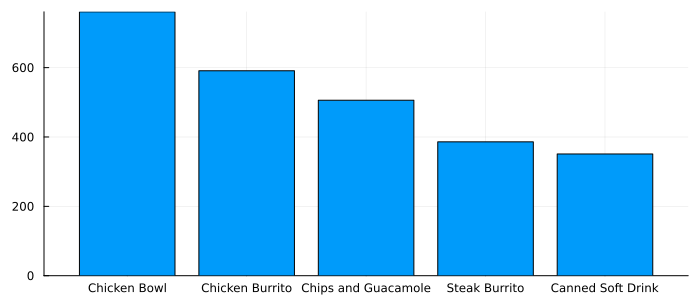

In [4]:
top_items = sort(
    combine(
        groupby(
            chipo, :item_name
        ), :quantity => sum => :quantity
    ), :quantity, rev=true
)

top_items = top_items[1:5, :]
bar(top_items[!, :item_name], top_items[!, :quantity], size=(700, 300), legend=false)

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

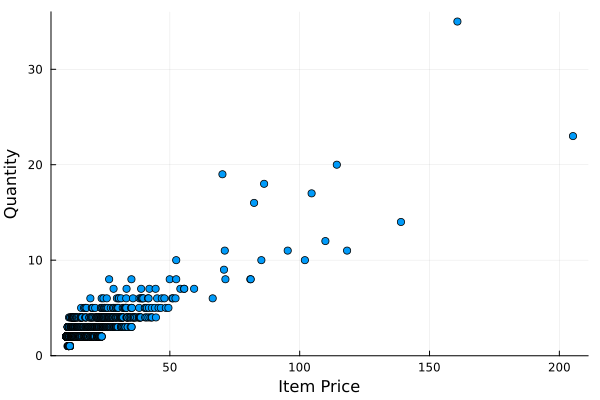

In [5]:
chipo.item_price = strip.(chipo.item_price, ['$'])
chipo.item_price = parse.(Float64, chipo.item_price)

chipo = sort(
    combine(
        groupby(
            chipo, :order_id
        ),
        :item_price => sum => :item_price,
        :quantity => sum => :quantity
    ), :item_price, rev=false
)

scatter(chipo[!, :item_price], chipo[!, :quantity], legend=false, xlabel="Item Price", ylabel="Quantity")

### Step 7. BONUS: Create a question and a graph to answer your own question.